In [1]:
import numpy as np
import matplotlib.pyplot as plt
system_name = 'kite2d'
data_dir = '../data/'
plot_dir = '../plots/'

## Evaluate the 2d kite at fixed attack angle for different angles

In [54]:
run_name = 'prova'

params = dict()

# ENVIRONMENT PARAMETERS
env_params = dict()
env_params['int_steps'] = 0.0001 # sec
env_params['ep_length'] = 10 # sec
env_params['decision_time'] = 0.01 # sec
env_params['init_theta'] = np.pi/4 # rad
env_params['init_dtheta'] = 0 # rad
env_params['init_alpha'] = 10 # rad. Choosing alpha>=15 the initial attack angle is randomly chosen
env_params['v_wind_x'] = 15 # m/sec
env_params['v_wind_y'] = 0 # m/sec

# EVALUATION PARAMETERS
params['ev_time'] = 15 # sec
params['traj_points'] = 1000
params['gamma'] = 1

In [55]:
# WRITING THE PARAMETERS
f = open(data_dir + system_name + '/' + run_name + "/param_ev.txt", "w")
for k,v in params.items():
    f.write(k + "\t" + str(v) + "\n")
f.close()
f = open(data_dir + system_name + '/' + run_name + "/param_env.txt", "w")
for k,v in env_params.items():
    f.write(k + "\t" + str(v) + "\n")
f.close()

In [23]:
# COMPILING C++ SCRIPT
import subprocess
p = subprocess.Popen(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/"+system_name+".cpp", "-std=c++17"], 
                      stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.communicate()[1].decode('utf-8'))
#print(p.communicate()[1].decode('utf-8'))

In [17]:
def write_policy(alpha):
    file = open(data_dir + system_name + '/' + run_name + "/best_policy.txt", "w")
    for a in range(15):
        if a < alpha:
            file.write("0 0\n")
        elif a == alpha:
            file.write("0 1\n")
        else:
            file.write("1 0\n")
    file.close()

In [18]:
def execute():
    p = subprocess.Popen(["./evaluate.exe", system_name, run_name], \
                           stdout=subprocess.PIPE, stderr=subprocess.PIPE)

In [19]:
def comp_av_return():
    returns=np.array([], dtype=float)
    f = open(data_dir + system_name + '/' + run_name + "/ev_return.txt", "r")
    for line in f.readlines():
        returns = np.append(returns, float(line))
    return returns.mean()

In [61]:
traj_x, traj_y = [], []
alphas = []

In [89]:
alpha = 14
write_policy(alpha)
alphas.append(alpha)

In [91]:
execute()
comp_av_return()

81.0145

In [92]:
f = open(data_dir + system_name + '/' + run_name + "/ev_states.txt", "r")
st_traj = []
st_labels = f.readline().split()
for line in f.readlines():
    st_traj.append(line.split())
st_traj = np.array(st_traj, dtype='float')
#st_traj = np.loadtxt(data_dir + system_name + '/' + run_name + "/ev_states.txt", dtype='float')

traj_x.append(st_traj[:,0])
traj_y.append(st_traj[:,1])

In [93]:
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))

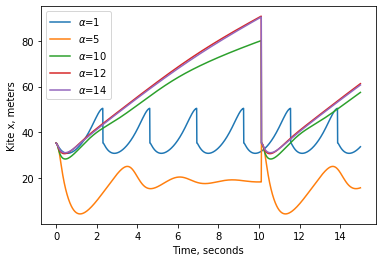

In [94]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite x, meters')
for i in range(len(traj_x)):
    plt.plot(xs, traj_x[i], label=r'$\alpha$='+str(alphas[i]))
plt.legend()
plt.savefig(plot_dir + system_name + '/' + run_name + "/kite_x_traj2.png", dpi=200)

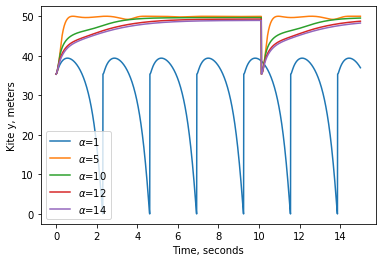

In [95]:
plt.xlabel('Time, seconds')
plt.ylabel('Kite y, meters')
for i in range(len(traj_y)):
    plt.plot(xs, traj_y[i], label=r'$\alpha$='+str(alphas[i]))
plt.legend()
plt.savefig(plot_dir + system_name + '/' + run_name + "/kite_y_traj2.png", dpi=200)

In [76]:
len(st_traj)

550